<a href="https://colab.research.google.com/github/FilippoIspanico/ANNDL/blob/main/regression_Boston_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices: a regression example
The value to be predict, the houses prices, is continuos. Hence this is a regrassion problem.

The boston housing dataset will be used. It is a pretty small dataset hence, it will be used **k-fold cross validation**

In [4]:
from keras.datasets import boston_housing

In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [6]:
print(train_data.shape)
print(train_data[0]) # form here we observe that the features are eterogeneus--> we need to normalize them

(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [7]:
mean = train_data.mean(axis = 0) # it is a vector that contains the means of all the features
train_data -= mean
std = train_data.std(axis = 0)
train_data /=std

# we need to normalize also the test data, but to do so we use the mean and std of the train data! NEVER USE IN WORKFLOW ANY QUANTITY COMPUTED ON THE TEST DATA
test_data -= mean
test_data /=std

### Building the model

In [8]:
from keras import models, layers

In [17]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

### k-fold-cross validation


In [14]:
import numpy as np

In [24]:
k = 4
num_val_samples = len(train_data) // k #note that the operator // is the floor division i.e 3//2 = 1
num_epochs = 500
all_scores = []
all_mae_histories = []

**Warning!** The next is highy latency code!

In [22]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [25]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]


  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)

  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)

  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
print(all_scores)
print(np.mean(all_scores))

[2.216269016265869, 2.4961483478546143, 2.8111085891723633, 2.4931888580322266]
2.5041787028312683


In [27]:
# so now we fix i. i is a number of an epoch.
# for that epoch we compute the average of the k mae errors.
# in this way we obtain a sequence of avereage of lenght = no_epochs
average_mae_histories = [

            np.mean(
                [x[i] for x in all_mae_histories]
                )
            for i in range(num_epochs)
            ]



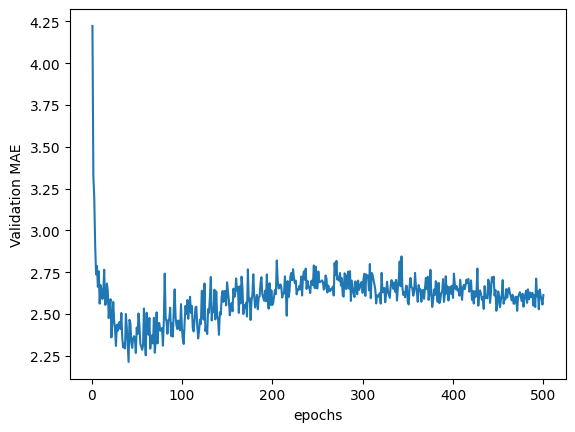

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_histories) + 1 ), average_mae_histories)
plt.xlabel('epochs')
plt.ylabel('Validation MAE')
plt.show()

### Building a new model
once seen the optimal no. of epochs we start training a new model from scratch but we use all the test data! (no more validation!)

In [32]:
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 17.5267 - mae: 2.6164
2.61639404296875
